In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/My Drive/PJME_hourly.csv" "pjme.csv" #import processed datasets

In [ ]:
df = pd.read_csv("pjme.csv")
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
df

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


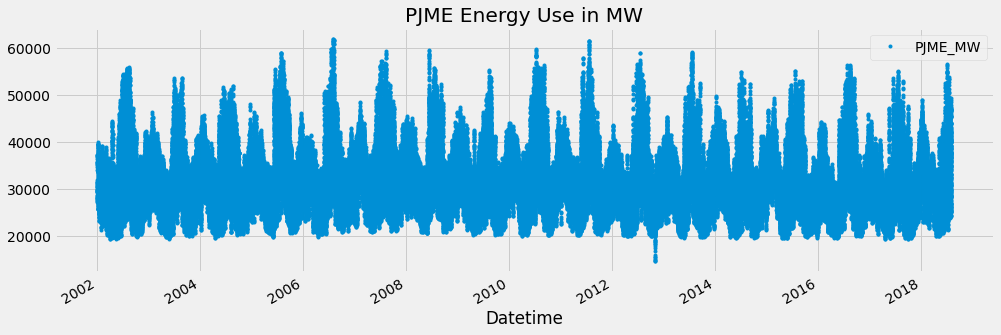

In [ ]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='PJME Energy Use in MW')
plt.show()

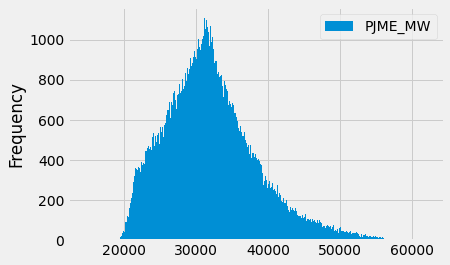

In [ ]:
df.plot(kind='hist', bins=500)

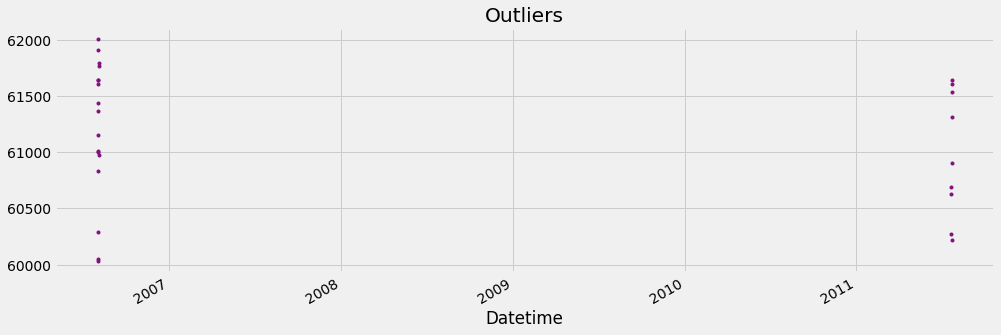

In [ ]:
df.query('PJME_MW > 60_000')['PJME_MW'] \
    .plot(style='.',
          figsize=(15, 5),
          color=color_pal[5],
          title='Outliers')

In [ ]:
df = df.loc[(df.PJME_MW < 60000)&(df.PJME_MW > 19000)]

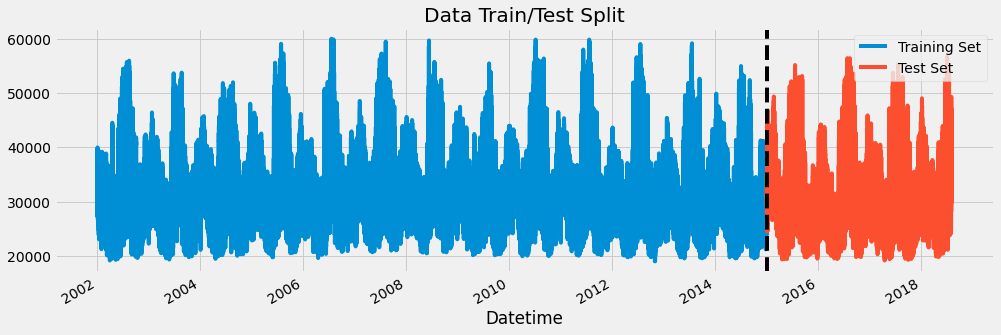

In [ ]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()


In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)
df = df.sort_index()

def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['lag_24h'] = df.PJME_MW.shift(24).backfill()
    df['lag_24h'] = df.PJME_MW.shift(24).backfill()
    return df

df = create_features(df)
FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month','year', 'lag_24h']
TARGET = 'PJME_MW'

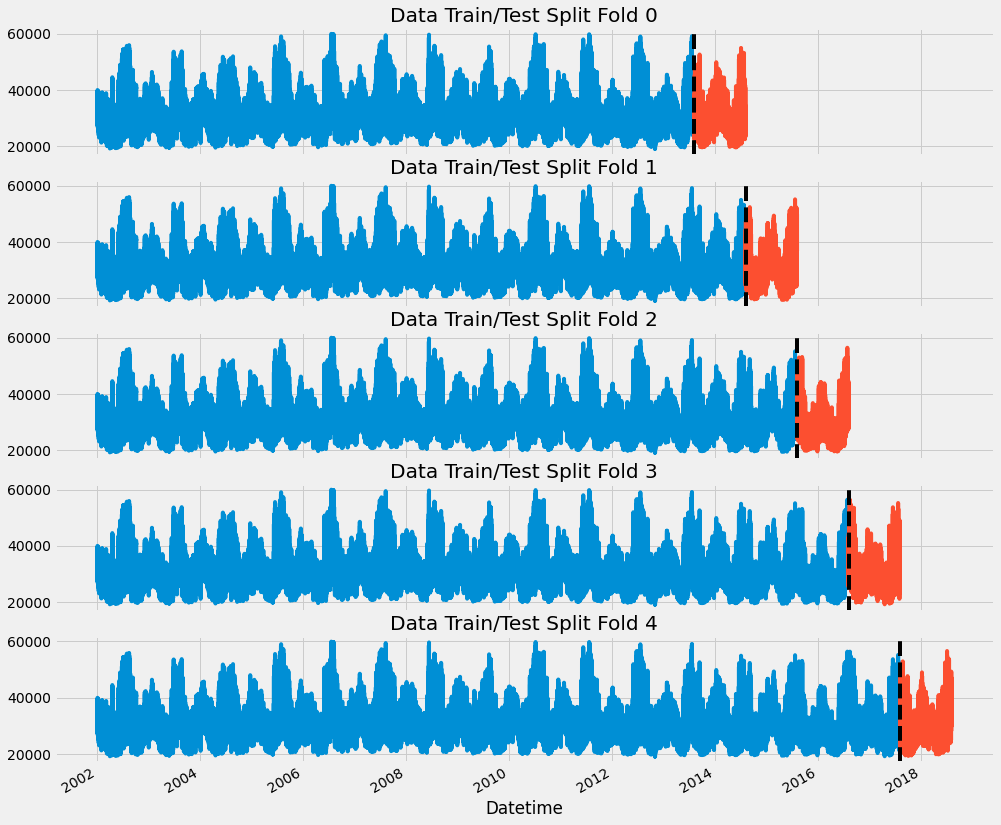

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['PJME_MW'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['PJME_MW'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

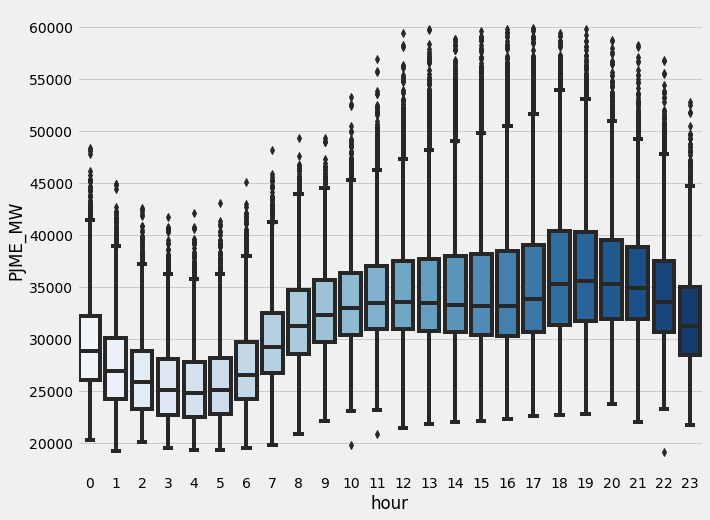

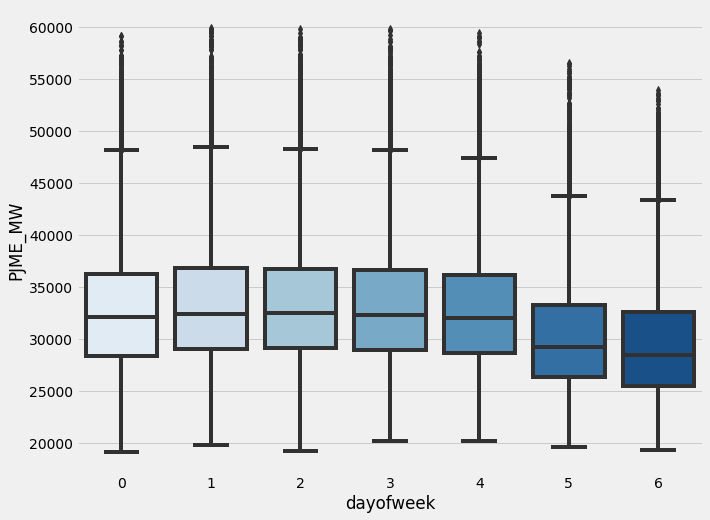

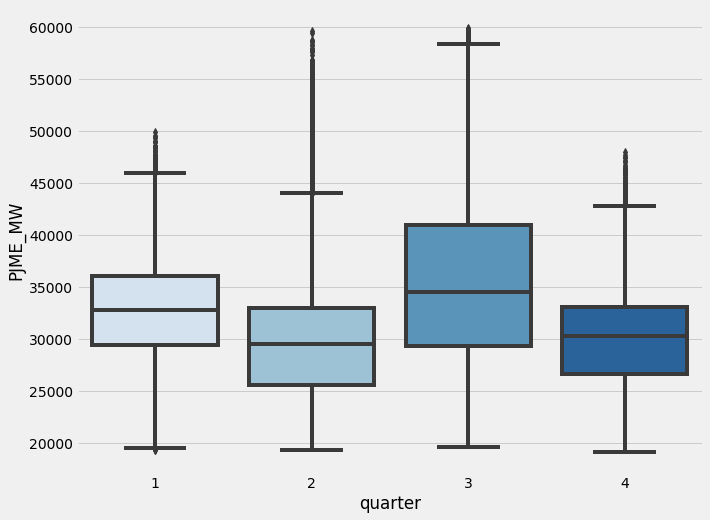

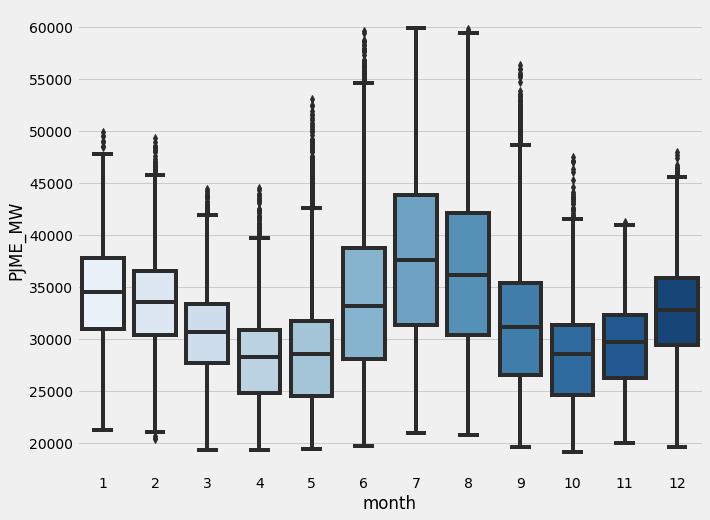

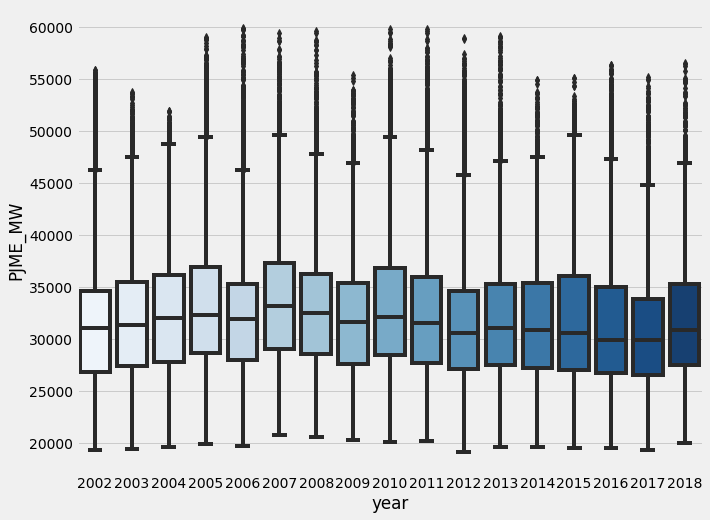

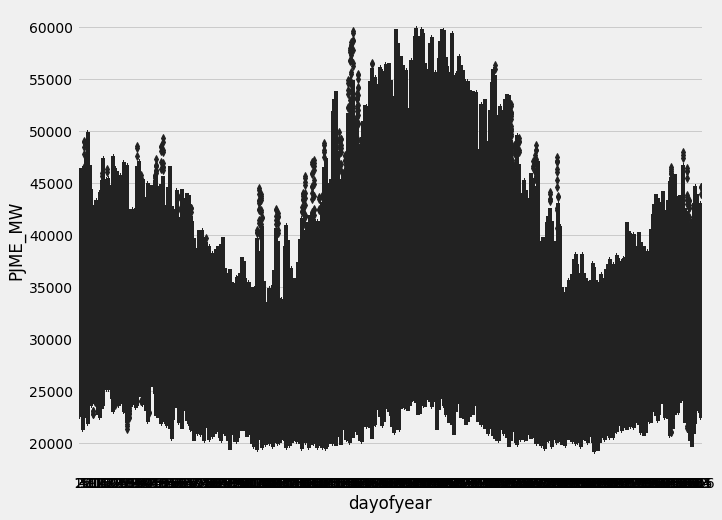

In [ ]:
for date in df.columns[1:-2]:
  fig. ax = plt.subplots(figsize=(10, 8))
  sns.boxplot(data=df, x=date, y='PJME_MW', palette='Blues')
  ax.set_title(f'MW by {date}')
  plt.show 

In [ ]:
tss = TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)
df = df.sort_index()


# fold = 0
# preds = []
# scores = []
# for train_idx, val_idx in tss.split(df):
#     train = df.iloc[train_idx]
#     test = df.iloc[val_idx]

#     train = create_features(train)
#     test = create_features(test)

#     X_train = train[FEATURES]
#     y_train = train[TARGET]

#     X_test = test[FEATURES]
#     y_test = test[TARGET]

#     reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
#                            n_estimators=1000,
#                            early_stopping_rounds=50,
#                            objective='reg:linear',
#                            max_depth=3,
#                            learning_rate=0.01)
#     reg.fit(X_train, y_train,
#             eval_set=[(X_train, y_train), (X_test, y_test)],
#             verbose=100)

#     y_pred = reg.predict(X_test)
#     preds.append(y_pred)
#     score = np.sqrt(mean_squared_error(y_test, y_pred))
#     scores.append(score)

In [ ]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 2420.4912
Fold scores:[2487.7360134513465, 2393.75963139613, 2151.039984086478, 2477.675035369565, 2592.2455838718997]


In [ ]:
train = create_features(train)
test = create_features(test)
X_train = train[FEATURES]
Y_train = train[TARGET]

X_test = test[FEATURES]
Y_test = test[TARGET]

reg.fit(X_train, Y_train, eval_set = [(X_train, Y_train), (X_test, Y_test)],verbose = 100)

[16:18:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:32593.3	validation_1-rmse:31660.8
[100]	validation_0-rmse:12213.3	validation_1-rmse:11740.6
[200]	validation_0-rmse:5051.15	validation_1-rmse:4845.8
[300]	validation_0-rmse:2897.96	validation_1-rmse:2919.98
[400]	validation_0-rmse:2395.05	validation_1-rmse:2553.17
[500]	validation_0-rmse:2277.29	validation_1-rmse:2489.82
[600]	validation_0-rmse:2238.19	validation_1-rmse:2472.78
[700]	validation_0-rmse:2216.28	validation_1-rmse:2461.38
[800]	validation_0-rmse:2198.45	validation_1-rmse:2452.53
[900]	validation_0-rmse:2184.84	validation_1-rmse:2445.06
[999]	validation_0-rmse:2173.29	validation_1-rmse:2439.6


XGBRegressor(early_stopping_rounds=50, learning_rate=0.01, n_estimators=1000)

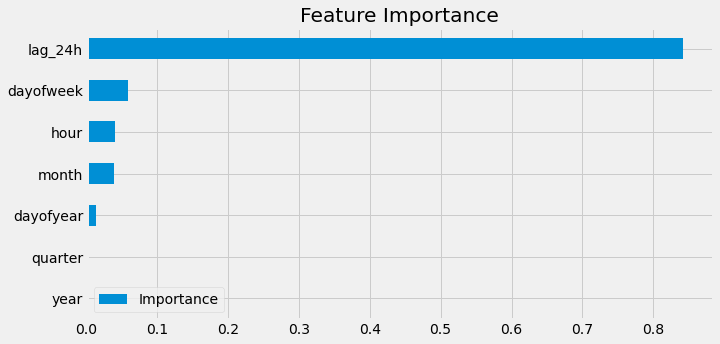

In [ ]:
fi = pd.DataFrame(data = reg.feature_importances_, index = reg.get_booster().feature_names, columns = ["Importance"])
fi.sort_values("Importance").plot(kind = "barh", title = "Feature Importance", figsize = (10, 5))
plt.show()

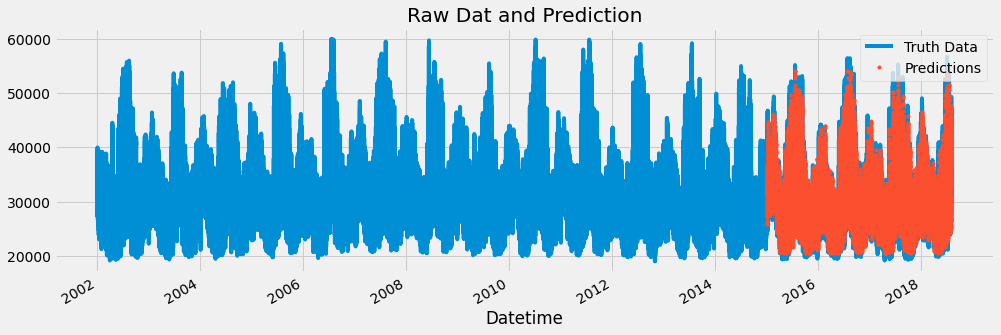

In [ ]:
test["predictions"] = reg.predict(X_test)
df = df.merge(test[["predictions"]], how= "left",left_index = True, right_index = True)
ax = df[['PJME_MW']].plot(figsize=(15, 5))
df['predictions'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [ ]:
score = np.sqrt(r2_score(test["PJME_MW"], test["predictions"]))
print(f"RMSE score on the test set :{score:0.2f}")

RMSE score on the test set :0.93


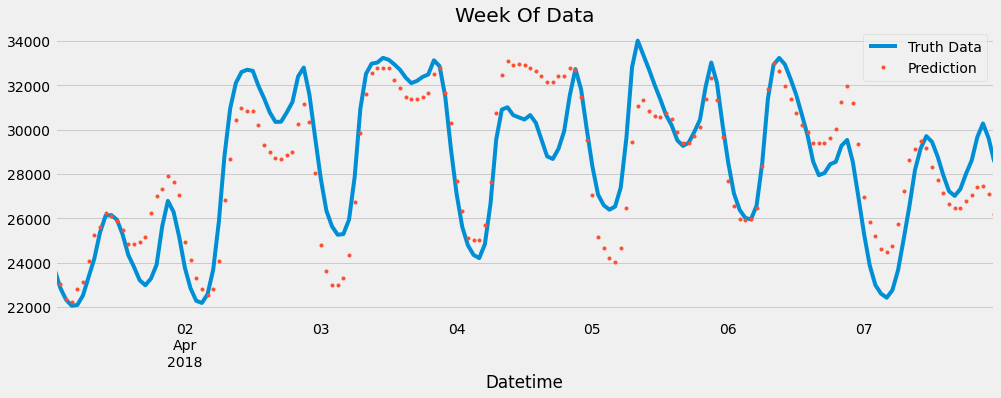

In [ ]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['PJME_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['predictions'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()